<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

In [3]:
data = pd.read_csv('./train.csv')
data.sample(5) # посмотрим на случайные пять строчек данных

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3011,12,86.55,1066.9,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0
1207,36,104.50,3684.95,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
2860,11,70.20,834.7,Male,1,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
4233,67,84.80,5598.3,Female,0,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,One year,No,Bank transfer (automatic),0
224,1,19.75,19.75,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,0


In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Загрузим сразу и тестовые данные, чтобы все преообразования делать одновременно и на трейн-, и на тест-выборке.

In [5]:
Kaggle_data = pd.read_csv('./test.csv')
Kaggle_data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,13,20.85,272.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,2,91.45,171.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,19,89.10,1620.8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [6]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

В данных нет пропущенных значений, для каждого признака есть 5282 значения - это число всех объектов. 
Что важно: TotalSpent - числовой признак, но тип данных у него - строка (объект), его нужно перевести в числовой вид. В категориальных признаках есть бинарный признак IsSeniorCitizen, он в числовом виде - 0/1. Если найдутся и другие бинарные признаки среди категориальных, то их также можно перевести в вид 0/1, для удобства работы логистической регрессии. 

In [8]:
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Теперь видно, что пропущенные значения в данных все-таки есть - у признака TotalSpent 9 пропущенных значений. Посмотрим на них.

In [9]:
data[data.TotalSpent.isna()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


У всех объектов с пропущенными данными по TotalSpent стоят нули в колонке ClientPeriod. Тогда посмотрим на те строки, у которых ClientPeriod равен 0, чтобы понять, что это за данные.

In [10]:
data[data.ClientPeriod == 0]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Но это в точности те же самые объекты, что мы видели выше, имеющие NaN в колонке TotalSpent. Возможно, это данные новых клиентов, у которых время пользования услугами компании было меньше 1 периода. Тогда если подсчет потраченных денег ведется после пройденного периода, логично, что у новых клиентов технически TotalSpent еще не посчитан. Тогда можно заменить пропущенные значения TotalSpent на значения из признака MonthlySpending (оплата в месяц). При этом 0 в ClientPeriod можно заменить на 1. Если посмотреть объекты, у которых ClientPeriod=1, то у них всех значения в TotalSpent и в MonthlySpending одинаково, так что с такими заменами мы следуем логике данных.  

In [11]:
data[data.ClientPeriod == 1]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
7,1,45.70,45.70,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
51,1,74.45,74.45,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
63,1,48.45,48.45,Female,0,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
67,1,24.40,24.40,Male,0,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,1,69.65,69.65,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
5199,1,19.70,19.70,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
5257,1,19.20,19.20,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
5265,1,85.80,85.80,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,1


In [12]:
# Замена значений

data.TotalSpent.where(data.TotalSpent > 0, data.MonthlySpending, inplace=True) 
data.ClientPeriod.where(data.ClientPeriod > 0, 1, inplace=True)

data.iloc[1048] # Проверим изменения на одном объекте

ClientPeriod                                  1
MonthlySpending                           25.75
TotalSpent                                25.75
Sex                                        Male
IsSeniorCitizen                               0
HasPartner                                  Yes
HasChild                                    Yes
HasPhoneService                             Yes
HasMultiplePhoneNumbers                     Yes
HasInternetService                           No
HasOnlineSecurityService    No internet service
HasOnlineBackup             No internet service
HasDeviceProtection         No internet service
HasTechSupportAccess        No internet service
HasOnlineTV                 No internet service
HasMovieSubscription        No internet service
HasContractPhone                       Two year
IsBillingPaperless                           No
PaymentMethod                      Mailed check
Churn                                         0
Name: 1048, dtype: object

Сделаем все то же самое и для тестовых данных.

In [13]:
Kaggle_data.TotalSpent = pd.to_numeric(Kaggle_data.TotalSpent, errors='coerce')
Kaggle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1759 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [14]:
Kaggle_data.TotalSpent.where(Kaggle_data.TotalSpent > 0, Kaggle_data.MonthlySpending, inplace=True) 
Kaggle_data.ClientPeriod.where(Kaggle_data.ClientPeriod > 0, 1, inplace=True)
Kaggle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

Посмотрим, есть ли дубликаты в данных и удалим их, если они есть.

In [15]:
data.duplicated().sum()

14

In [16]:
print(data.shape)
data = data.drop_duplicates().reset_index(drop=True)
print(data.shape)

(5282, 20)
(5268, 20)


Удалять пропуски в тестовых данных не будем, иначе будет расхождение с размерностью submission.csv

## Анализ данных (3 балла)

1) Для численных признаков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном графике с помощью *plt.subplots(...)*).

In [17]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики в jupyter'e
import seaborn as sns
%matplotlib inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

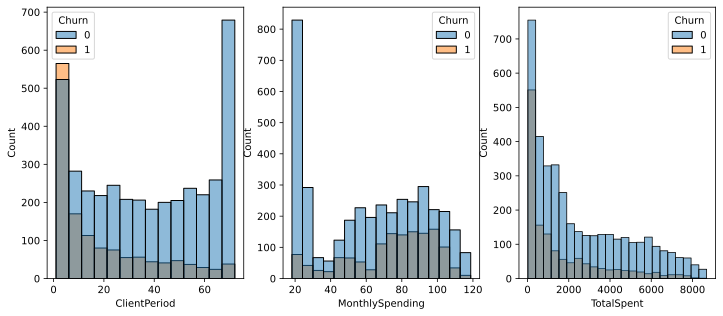

In [18]:
# гистограммы числовых признаков с точки зрения целевой переменной

fig, axes = plt.subplots(ncols=3, figsize=(12, 5)) 

for idx, feat in enumerate(num_cols):
    sns.histplot(data, x=feat, hue='Churn', ax=axes[idx]);

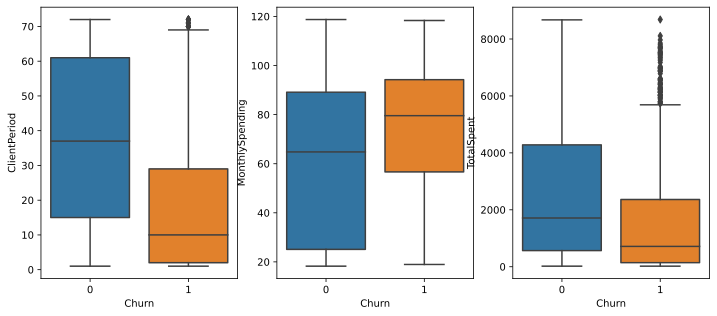

In [19]:
# боксплоты числовых признаков с точки зрения целевой переменной

fig, axes = plt.subplots(ncols=3, figsize=(12, 5)) 

for idx, feat in enumerate(num_cols):
    sns.boxplot(x='Churn', y=feat, data=data, ax=axes[idx])
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(feat);

По гистограммам и боксплотам числовых признаков выше видно, что наиболее подверженная ухода группа клиентов - это новые пользователи (небольшие значения ClientPeriod), у которых большой ежемесячный платеж (признак MonthlySpending).

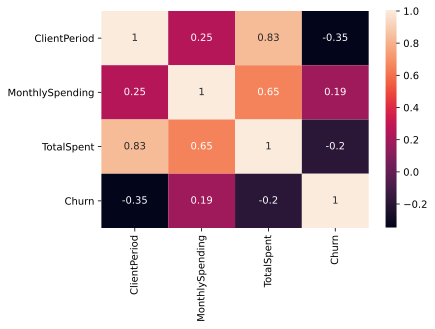

In [20]:
# Матрица корреляции количественных признаков и целевой переменной

corr_matrix_quantitative = data[num_cols + ['Churn']].corr()
sns.heatmap(corr_matrix_quantitative, annot = True);

Матрица корреляции подтверждает, что наибольшее влияние на целевую переменную среди количественных признаков оказывает ClientPeriod: коэффициент корреляции -0.35, т.е. чем меньше времени клиент с компанией, тем выше вероятность, что он уйдет.

In [21]:
# Посмотрим на возможные значения категориальных признаков

for col in cat_cols:
    print(col)
    print(data[col].value_counts())
    print('\n')

Sex
Male      2647
Female    2621
Name: Sex, dtype: int64


IsSeniorCitizen
0    4427
1     841
Name: IsSeniorCitizen, dtype: int64


HasPartner
No     2691
Yes    2577
Name: HasPartner, dtype: int64


HasChild
No     3662
Yes    1606
Name: HasChild, dtype: int64


HasPhoneService
Yes    4747
No      521
Name: HasPhoneService, dtype: int64


HasMultiplePhoneNumbers
No                  2497
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64


HasInternetService
Fiber optic    2335
DSL            1798
No             1135
Name: HasInternetService, dtype: int64


HasOnlineSecurityService
No                     2604
Yes                    1529
No internet service    1135
Name: HasOnlineSecurityService, dtype: int64


HasOnlineBackup
No                     2324
Yes                    1809
No internet service    1135
Name: HasOnlineBackup, dtype: int64


HasDeviceProtection
No                     2309
Yes                    1824
No internet service  

Среди категориальных признаков можно увидеть 6 бинарных признаков, включая упоминавшийся уже IsSeniorCitizen: Sex, IsSeniorCitizen, HasPartner, HasChild, HasPhoneService, IsBillingPaperless. Учтем это для дальнейшей обработки данных.

In [22]:
bin_cols = [    
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless'
]

Создадим вторую переменную для категориальных признаков, убрав из них бинарные признаки. Это также будет нужно для дальнейшей обработки данных.

In [23]:
only_cat_cols = list(set(cat_cols) - set(bin_cols))
only_cat_cols

['HasContractPhone',
 'HasOnlineSecurityService',
 'HasOnlineTV',
 'PaymentMethod',
 'HasTechSupportAccess',
 'HasMovieSubscription',
 'HasInternetService',
 'HasMultiplePhoneNumbers',
 'HasOnlineBackup',
 'HasDeviceProtection']

Вернемся к визуализации данных.

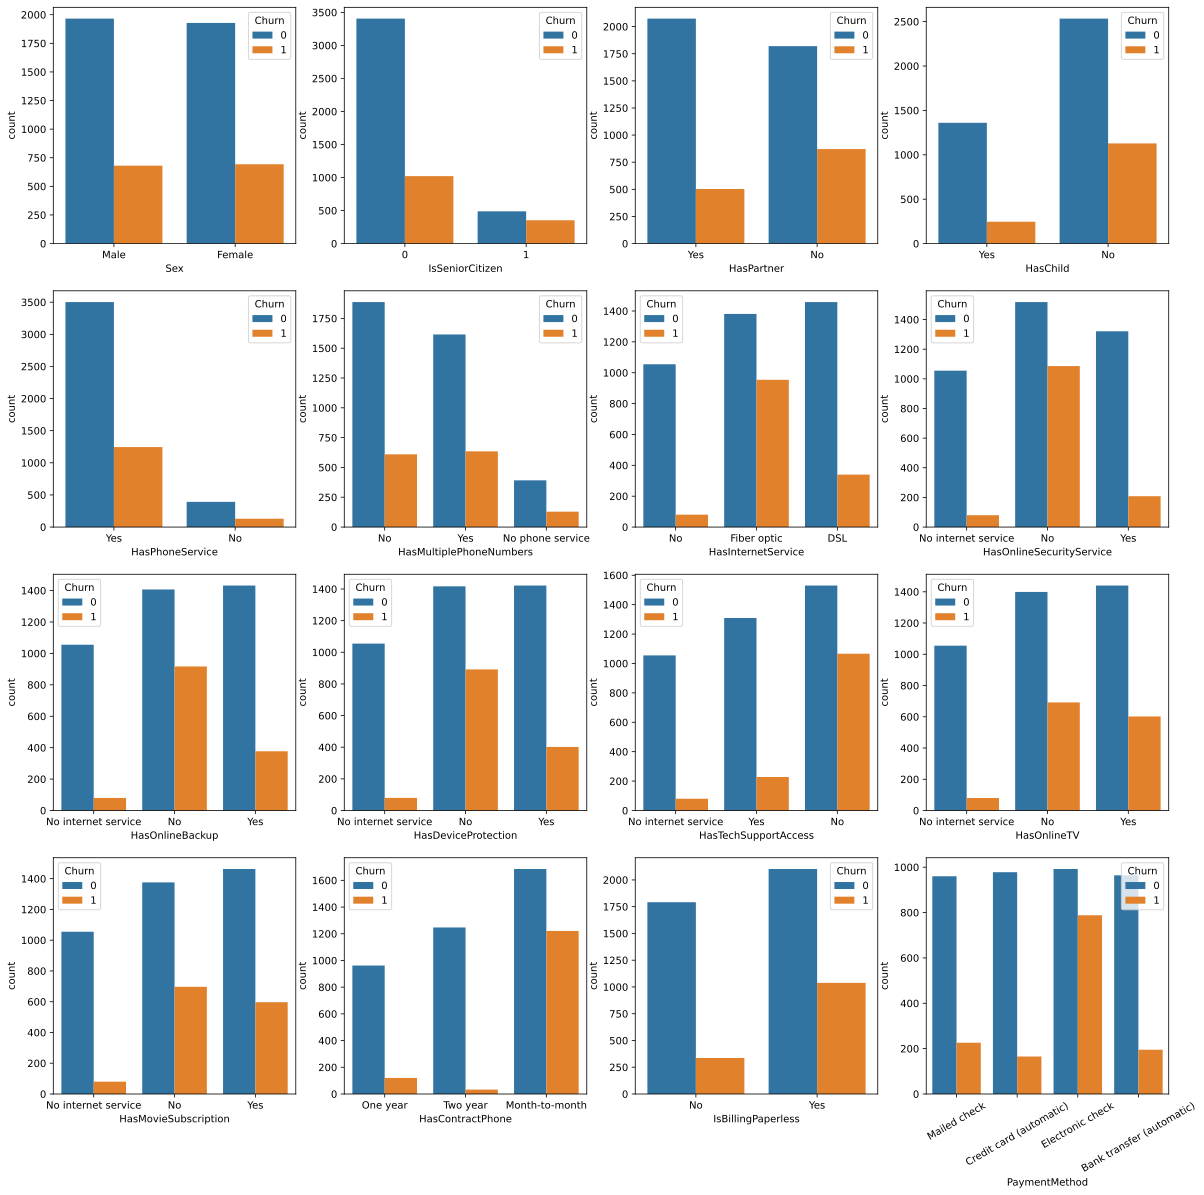

In [24]:
# Визуализируем категориальные признаки относительно целевой переменной при помощи countplot

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for idx, feat in enumerate(cat_cols):
    sns.countplot(x=feat, hue='Churn', data=data, ax=axes[idx // 4, idx % 4])
    if idx == 15:
        axes[idx // 4, idx % 4].tick_params(axis='x', labelrotation=30);    # наклон надписей, чтобы они поместились на графике

По рисунку заметно, что пол клиента не оказывает влияние на целевую переменную. Поэтому кажется, что признак Sex можно было бы удалить из данных. Но не стоит сразу этого делать, возможно, признак оказывает влияние совместно с каким-то другим признаком. При наличии времени это нужно проверить, сравнив качество алгоритма на кросс-валидации на данных с признаком и без него.

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

0.2608200455580866


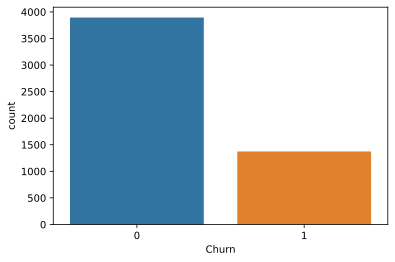

In [25]:
print(data.Churn.mean())

sns.countplot(data.Churn);

Среднее у целевой переменной - 0.26, т.е. выборка скорее несбалансирована, поскольку класс "1" составляет четверть от всей выборки. Будем учитывать это при настройке алгоритмов в дальнейшем.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

Создадим пайплайн обработки данных, чтобы применять его на кросс-валидации. Он будет скалировать числовые данные, бинарные данные переведет в 0 и 1, а для категориальных данных сделает OneHot-кодирование. Поскольку пайплайн будет использоваться на кросс-валидации, то он не будет скалировать числовые признаки сразу на всех данных, а будет обучать скалер сначала на трейн-данных, а потом применять его и к трейн-, и к тест-части, чтобы в трейне не было никакой информации о тестовых данных. 

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [27]:
preprocessing_pipeline = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('bin', OneHotEncoder(drop='first'), bin_cols), # OneHotEncoder делает из бин.признака два признака, поэтому один удаляем
        ('cat', OneHotEncoder(), only_cat_cols)
    ])

Проверим, что после применения preprocessing_pipeline у нас должно стать 40 признаков (3 числовых, 6 бинарных, 9\*3+1\*4 категориальных).

In [28]:
names = data.columns
X = data[names[:-1]]
y = data[names[-1]]

In [29]:
prep_data = preprocessing_pipeline.fit_transform(X)
len(prep_data[0])

40

В процессе работы над заданием я добавляла в данные взаимодействие количественных признаков, т.е. попарное произведение количественных признаков и квадрат признаков. Это дало прирост качества в тысячные доли дл логистической регрессии на кросс-валидации, но н для катбуста. На Kaggle прироста это не дало, так что код приводить здесь не буду. 
При обучении будем пробовать учить модели на данных с ними и без них, и сравнивать качество. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scoring='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа превращаем в one-hot вектора.)

In [30]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline

In [31]:
# Вариант с LogisticRegressionCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    train_size=0.7,
                                                    random_state=42)

LR_model = make_pipeline(
    preprocessing_pipeline,
    LogisticRegressionCV(class_weight='balanced', scoring='roc_auc', refit=True) # балансируем классы через class_weight
)

LR_model.fit(X_train, y_train)
prediction = LR_model.predict(X_test)
roc_auc_score(y_test, prediction)

0.7706092669030871

In [33]:
LR_model.get_params()['logisticregressioncv__Cs'] # лучший параметр C

10

In [35]:
# Вариант с кросс-валидацией - переберем побольше параметров

LR_model = make_pipeline(
    preprocessing_pipeline,
    LogisticRegression(class_weight='balanced')
)

parameters = {'logisticregression__penalty':['l1', 'l2', 'elasticnet'],
             'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'logisticregression__max_iter':[100, 200, 300, 400, 500], 
             'logisticregression__l1_ratio':[0.2, 0.4, 0.6, 0.8]}

CV_LR_model = GridSearchCV(estimator=LR_model, 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10)

CV_LR_model.fit(X, y)

Fitting 5 folds for each of 2100 candidates, totalling 10500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1930s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 250 tas

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('bin',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                

In [36]:
CV_LR_model.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('bin',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'IsBillingPaperless']),
                                                 ('cat', OneHotEncoder(),
                                                  ['HasMovieSubscription',
                                                   'PaymentMethod',
                               

In [37]:
CV_LR_model.best_score_

0.8443109404862966

До применения бустингов попробуем также другие модели - случайный лес, к-ближайших соседей, метод опорных векторов.

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [39]:
# СЛУЧАЙНЫЙ ЛЕС

RF_model = make_pipeline(
    preprocessing_pipeline,
    RandomForestClassifier(class_weight='balanced')
)

RF_scoring = cross_validate(RF_model, X, y, scoring = 'roc_auc', cv = 5)
print(RF_scoring['test_score'].mean())

0.8146326641872081


Качество на кросс-валидации сопоставимое с логистической регрессией, попробуем подобрать наилучшие параметры  и посмотреть, как вырастет качество.

In [70]:
RF_model = make_pipeline(
    preprocessing_pipeline,
    RandomForestClassifier(class_weight='balanced')
)

parameters = {'randomforestclassifier__n_estimators':[100, 200, 300, 400, 500, 600, 700,800, 900, 1000],
             'randomforestclassifier__criterion':['gini', 'entropy'],
             'randomforestclassifier__max_features':['auto', 'sqrt', 'log2']}

CV_RF_model = GridSearchCV(estimator=RF_model, 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10)
CV_RF_model.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('bin',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                

In [71]:
CV_RF_model.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('bin',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'IsBillingPaperless']),
                                                 ('cat', OneHotEncoder(),
                                                  ['HasMovieSubscription',
                                                   'HasInternetService',
                          

In [72]:
CV_RF_model.best_score_

0.8203320381939765

Качество случайного леса с наилучшими параметрами чуть хуже чем у логистической регрессии.

In [40]:
# К БЛИЖАЙШИХ СОСЕДЕЙ

KN_model = make_pipeline(
    preprocessing_pipeline,
    KNeighborsClassifier(weights='distance')
)

KN_scoring = cross_validate(KN_model, X, y, scoring = 'roc_auc', cv = 5)
print(KN_scoring['test_score'].mean())

0.769615314638061


Качество хуже, чем у логистической регрессии и случайного леса. Но все равно подберем лучшие параметры, чтобы потом использовать алгоритм с лучшими параметрами в ансамбле алгоритмов.

In [75]:
KN_model = make_pipeline(
    preprocessing_pipeline,
    KNeighborsClassifier(weights='distance')
)

parameters = {'kneighborsclassifier__n_neighbors':[3, 4, 5, 6, 7, 8],
             'kneighborsclassifier__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'kneighborsclassifier__metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

CV_KN_model = GridSearchCV(estimator=KN_model, 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10)

CV_KN_model.fit(X, y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('bin',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                

In [76]:
CV_KN_model.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('bin',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'IsBillingPaperless']),
                                                 ('cat', OneHotEncoder(),
                                                  ['HasMovieSubscription',
                                                   'HasInternetService',
                          

In [77]:
CV_KN_model.best_score_

0.7913963482511728

До логистической регрессии и случайного леса метод к-ближайших соседей не дотягивает, но в ансамбле может пригодиться.

In [41]:
# МЕТОД ОПОРНЫХ ВЕКТОРОВ

SVC_model = make_pipeline(
    preprocessing_pipeline,
    SVC(class_weight='balanced')
)

SVC_scoring = cross_validate(SVC_model, X, y, scoring = 'roc_auc', cv = 5)
print(SVC_scoring['test_score'].mean())

0.8241981559865769


Качество на кросс-валидации сопоставимое с логистической регрессией, попробуем подобрать наилучшие параметры.

In [79]:
SVC_model = make_pipeline(
    preprocessing_pipeline,
    SVC(class_weight='balanced')
)

parameters = {'svc__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'svc__gamma':['scale', 'auto']}

CV_SVC_model = GridSearchCV(estimator=SVC_model, 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10)

CV_SVC_model.fit(X, y)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('bin',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                

In [80]:
CV_SVC_model.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('bin',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'IsBillingPaperless']),
                                                 ('cat', OneHotEncoder(),
                                                  ['HasMovieSubscription',
                                                   'HasInternetService',
                          

In [81]:
CV_SVC_model.best_score_

0.8422286653514419

Качество отличается от логрегрессии только в третьем знаке после запятой, значит тоже сильная модель.

Попробуем использовать ансамбль моделей для улучшения предсказания. Начнем с бэггинга.

In [35]:
from sklearn.ensemble import VotingClassifier

In [43]:
# Голосование 'hard' - по правилу большинства

estimators = []
model1 = LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.2, max_iter=500, penalty='l1', solver='saga')
estimators.append(('Logistic', model1))
model2 = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features='log2', n_estimators=400)
estimators.append(('RandomForest', model2))
model3 = KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=8, weights='distance')
estimators.append(('KNeighbors', model3))
model4 = SVC(C=100, class_weight='balanced', kernel='linear')
estimators.append(('SVC', model4))

ensemble = VotingClassifier(estimators, voting='hard', weights=[0.35, 0.2, 0.1, 0.35]) # для всех моделей в ансамбле
# веса в соответствии с тем, насколько хороший скор дает модель

In [44]:
# Кросс-валидация для VotingClassifier не удалась, выдает ошибку
# AttributeError: 'VotingClassifier' object has no attribute 'decision_function'
# Поэтому ручная кросс-валидация

roc_auc_list = []

for i in range(5):
    train_data, test_data, train_labels, test_labels = train_test_split(X, y, stratify=y, test_size=0.3)
    train_data = preprocessing_pipeline.fit_transform(train_data)
    test_data = preprocessing_pipeline.transform(test_data)
    ensemble.fit(train_data, train_labels)
    predicted = ensemble.predict(test_data)
    score = roc_auc_score(test_labels, predicted)
    roc_auc_list.append(score)

In [45]:
roc_auc_list = np.array(roc_auc_list)
print(roc_auc_list.mean())

# hard - predict 0.7638465786872856

0.7638465786872856


In [46]:
# Голосование 'soft' - прогноз метки класса на основе argmax сумм прогнозируемых вероятностей
# у SVC нет predict_proba(), так что оставляем только три модели в ансамбле 

estimators = []
model1 = LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4, solver='saga')
estimators.append(('Logistic', model1))
model2 = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features='log2', n_estimators=400)
estimators.append(('RandomForest', model2))
model3 = KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=8, weights='distance')
estimators.append(('KNeighbors', model3))

ensemble = VotingClassifier(estimators, voting='soft', weights=[0.5, 0.4, 0.1]) 
# веса в соответствии с тем, насколько хороший скор дает модель

In [47]:
roc_auc_list = []

for i in range(5):
    train_data, test_data, train_labels, test_labels = train_test_split(X, y, stratify=y, test_size=0.3)
    train_data = preprocessing_pipeline.fit_transform(train_data)
    test_data = preprocessing_pipeline.transform(test_data)
    ensemble.fit(train_data, train_labels)
    predicted = ensemble.predict_proba(test_data)[:, 1]
    score = roc_auc_score(test_labels, predicted)
    roc_auc_list.append(score)

In [48]:
roc_auc_list = np.array(roc_auc_list)
print(roc_auc_list.mean())

# soft - predict_proba 0.8417384371340537

0.8417384371340537


Бэггинг моделей не улучшил результат лучшей из них - логистической регрессии. Попробуем теперь стекинг. 

In [36]:
from sklearn.model_selection import cross_val_predict

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    train_size=0.7,
                                                    random_state=42)

X_train = preprocessing_pipeline.fit_transform(X_train)
X_test = preprocessing_pipeline.transform(X_test)

In [91]:
# здесь мета-признаком будет класс

def compute_meta_feature(model, X_train, X_test, y_train, cv):
    
    train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')
    model.fit(X_train, y_train)
    return train_answers, model.predict(X_test)

In [92]:
models = []
models.append(LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4, solver='saga'))
models.append(RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features='log2', n_estimators=400))
models.append(KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=8, weights='distance'))
models.append(SVC(C=100, class_weight='balanced', kernel='linear'))

In [93]:
meta_features_train = np.zeros((X_train.shape[0], 0))
meta_features_test = np.zeros((X_test.shape[0], 0))

In [94]:
from tqdm.notebook import tqdm

for model in tqdm(models):
    train, test = compute_meta_feature(model, X_train, X_test, y_train, 5)
    meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)
    meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

In [95]:
meta_features_train

array([[1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [96]:
stacking_model = LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4, solver='saga')

stacking_scoring = cross_validate(stacking_model, meta_features_train, y_train, scoring = 'roc_auc', cv = 5)
print(stacking_scoring['test_score'].mean())

0.7982802720603381


Вариант "признаки - предсказаные классы" не повышают качество. А если признаки - это вероятности первого класса?

In [97]:
# здесь мета-признаком будет вероятность первого класса

def compute_meta_feature_proba(model, X_train, X_test, y_train, cv):
    
    train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
    model.fit(X_train, y_train)
    return train_answers, model.predict_proba(X_test)[:, 1]

In [98]:
models = []
models.append(LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4, solver='saga'))
models.append(RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features='log2', n_estimators=400))
models.append(KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=8, weights='distance'))

In [99]:
meta_features_train = np.zeros((X_train.shape[0], 0))
meta_features_test = np.zeros((X_test.shape[0], 0))

In [100]:
for model in tqdm(models):
    train, test = compute_meta_feature_proba(model, X_train, X_test, y_train, 5)
    meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)
    meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

In [101]:
meta_features_train

array([[0.89426937, 0.5175    , 0.89036156],
       [0.10062449, 0.0225    , 0.        ],
       [0.24594808, 0.0875    , 0.11006607],
       ...,
       [0.06456229, 0.0275    , 0.        ],
       [0.21449248, 0.0475    , 0.        ],
       [0.01409971, 0.        , 0.        ]])

In [102]:
stacking_model = LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4, solver='saga')

stacking_scoring = cross_validate(stacking_model, meta_features_train, y_train, scoring = 'roc_auc', cv = 5)
print(stacking_scoring['test_score'].mean())

0.8399061722599864


Качество логрегрессии также не удалось перепрыгнуть. Присоединение мета-признаков к основным признакам и обучение моделей на этой совокупности также не дало прироста качества, этот код писать не буду, чтобы не перегружать восприятие.

Таким образом лучшая модель из расмотренных выше - это LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.2, max_iter=500, penalty='l1', solver='saga'), которая дает качество 0.8443 на кросс-валидации.

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

In [38]:
from catboost import CatBoostClassifier

In [39]:
# для более точного результата используем кросс-валидацию, а не деление на трейн-тест

model = CatBoostClassifier(n_estimators=200, cat_features=cat_cols, silent=True)
Cat_scoring = cross_validate(model, X, y, scoring = 'roc_auc', cv = 5)
print(Cat_scoring['test_score'].mean())

0.8415777241420374


2) Протестируйте разные значения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [125]:
grid = {'learning_rate': [0.03, 0.1, 1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'auto_class_weights':['Balanced', 'SqrtBalanced']}

Cat_model = CatBoostClassifier(n_estimators=200, cat_features=cat_cols, silent=True)

CV_Cat_model = Cat_model.grid_search(grid, 
                                       X=X, 
                                       y=y)


bestTest = 0.4672399396
bestIteration = 195

0:	loss: 0.4672399	best: 0.4672399 (0)	total: 15.3s	remaining: 22m 44s

bestTest = 0.4664688844
bestIteration = 110

1:	loss: 0.4664689	best: 0.4664689 (1)	total: 32.8s	remaining: 24m 1s

bestTest = 0.4800757345
bestIteration = 2

2:	loss: 0.4800757	best: 0.4664689 (1)	total: 49.4s	remaining: 23m 53s

bestTest = 0.4677144889
bestIteration = 196

3:	loss: 0.4677145	best: 0.4664689 (1)	total: 1m 4s	remaining: 23m

bestTest = 0.4670326132
bestIteration = 100

4:	loss: 0.4670326	best: 0.4664689 (1)	total: 1m 20s	remaining: 22m 46s

bestTest = 0.4834667608
bestIteration = 7

5:	loss: 0.4834668	best: 0.4664689 (1)	total: 1m 35s	remaining: 22m 22s

bestTest = 0.4686778275
bestIteration = 199

6:	loss: 0.4686778	best: 0.4664689 (1)	total: 1m 51s	remaining: 22m 1s

bestTest = 0.4668023904
bestIteration = 75

7:	loss: 0.4668024	best: 0.4664689 (1)	total: 2m 6s	remaining: 21m 40s

bestTest = 0.4763569578
bestIteration = 11

8:	loss: 0.4763570	best: 0.


bestTest = 0.4672227305
bestIteration = 70

70:	loss: 0.4672227	best: 0.4641793 (13)	total: 22m 12s	remaining: 5m 56s

bestTest = 0.48658646
bestIteration = 1

71:	loss: 0.4865865	best: 0.4641793 (13)	total: 22m 55s	remaining: 5m 43s

bestTest = 0.4668356917
bestIteration = 187

72:	loss: 0.4668357	best: 0.4641793 (13)	total: 23m 27s	remaining: 5m 27s

bestTest = 0.4669421143
bestIteration = 39

73:	loss: 0.4669421	best: 0.4641793 (13)	total: 24m 8s	remaining: 5m 13s

bestTest = 0.4868334959
bestIteration = 1

74:	loss: 0.4868335	best: 0.4641793 (13)	total: 24m 53s	remaining: 4m 58s

bestTest = 0.4693905073
bestIteration = 162

75:	loss: 0.4693905	best: 0.4641793 (13)	total: 25m 19s	remaining: 4m 39s

bestTest = 0.4647714766
bestIteration = 44

76:	loss: 0.4647715	best: 0.4641793 (13)	total: 25m 53s	remaining: 4m 22s

bestTest = 0.4749667294
bestIteration = 2

77:	loss: 0.4749667	best: 0.4641793 (13)	total: 26m 33s	remaining: 4m 5s

bestTest = 0.4654203931
bestIteration = 145

78:	los

In [126]:
CV_Cat_model['params']

{'depth': 4,
 'l2_leaf_reg': 9,
 'learning_rate': 0.1,
 'auto_class_weights': 'Balanced'}

In [127]:
Cat_model_2 = CatBoostClassifier(n_estimators=200, depth=4, l2_leaf_reg=9, learning_rate=0.1, auto_class_weights='Balanced',
                           cat_features=cat_cols, silent=True)
Cat_scoring_2 = cross_validate(Cat_model_2, X, y, scoring = 'roc_auc', cv = 5)
print(Cat_scoring['test_score'].mean())

0.8415777241420374


CatBoost с наилучшими параметрами дает качество на на 0.003 хуже, чем логистическая регрессия.

Попробуем другие виды бустингов.

In [40]:
from xgboost import XGBClassifier

XGB_model = make_pipeline(
    preprocessing_pipeline,
    XGBClassifier()
)

XGB_scoring = cross_validate(XGB_model, X, y, scoring = 'roc_auc', cv = 5)
print(XGB_scoring['test_score'].mean())

[11:24:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [42]:
from lightgbm import LGBMClassifier

LGBM_model = make_pipeline(
    preprocessing_pipeline,
    LGBMClassifier()
)

LGBM_scoring = cross_validate(LGBM_model, X, y, scoring = 'roc_auc', cv = 5)
print(LGBM_scoring['test_score'].mean())    

0.8238121207153342


XGBClassifier и LGBMClassifier ситуацию не улучшили. Из бустингов победил CatBoostClassifier(n_estimators=200, depth=4, l2_leaf_reg=9, learning_rate=0.1, auto_class_weights='Balanced', cat_features=cat_cols, silent=True) с качеством 0.8416. Для посылки на Kaggle используем и логистическую регрессию, и CatBoost, и посмотрим, кто победит на тестовых данных.

# Предсказания

In [51]:
# Используем модель с наилучшими параметрами для посылки на Каггл - ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
# Обучим для этого ее на всех данных

prep = preprocessing_pipeline
X_preprocessing = prep.fit_transform(X)

best_LR_model = LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.2, max_iter=500, penalty='l1', solver='saga')
best_LR_model.fit(X_preprocessing, y)

LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.2, max_iter=500,
                   penalty='l1', solver='saga')

In [52]:
best_model = best_LR_model

In [53]:
submission = pd.read_csv('./submission.csv')
submission

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
1756,1756,0.5
1757,1757,0.5
1758,1758,0.5
1759,1759,0.5


In [54]:
# Подготовим тестовые данные для логистической регрессии

Kaggle_data_for_LR = prep.transform(Kaggle_data)

In [55]:
submission['Churn'] = best_model.predict_proba(Kaggle_data_for_LR)[:, 1]

In [57]:
submission.set_index('Id', inplace=True)
submission

,Churn
Id,
0,0.112600
1,0.882789
2,0.850142
3,0.018058
4,0.004142
...,...
1756,0.225486
1757,0.062247
1758,0.882559


In [58]:
submission.to_csv('./my_submission_10_LR.csv') # Результат на Kaggle 0.84593

In [59]:
# Теперь используем модель с наилучшими параметрами для посылки на Каггл - КЭТБУСТ
# Обучим для этого ее на всех данных

best_CB = CatBoostClassifier(n_estimators=200, depth=4, l2_leaf_reg=9, learning_rate=0.1, auto_class_weights='Balanced',
                           cat_features=cat_cols, silent=True)

best_CB.fit(X, y)

In [60]:
best_model = best_CB

In [61]:
submission['Churn'] = best_model.predict_proba(Kaggle_data)[:, 1]

In [63]:
submission

,Churn
Id,
0,0.102164
1,0.844404
2,0.845939
3,0.028420
4,0.008037
...,...
1756,0.219707
1757,0.027560
1758,0.923045


In [64]:
submission.to_csv('./my_submission_11_CB.csv') # Результат на Kaggle 0.85388 - 49 место на утро 26.04.21

https://www.kaggle.com/evgeniyazadrutskaya

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.